# Exercise 2-1: FFT-Based Image Compression

### Objective
Explore how the **2D Fourier Transform** can be used to compress an image by exploiting the fact that most natural images have their energy concentrated in a small number of Fourier modes.

### Problem Statement
1. Load the image `dog.jpg` and convert it to grayscale.
2. Compute the 2D Fast Fourier Transform (FFT) of the grayscale image.
3. Perform image compression by **retaining only a fraction of the largest-magnitude Fourier coefficients** and setting the rest to zero.
4. Reconstruct the image using the inverse FFT for different compression ratios.
5. Compute the **reconstruction error** between the original and compressed images.
6. Plot the reconstruction error as a function of the compression ratio.

### Key Questions to Think About
- Where is most of the image energy located in the Fourier domain?
- Why does retaining a small fraction of coefficients still preserve image structure?
- How does the reconstruction error behave as the compression ratio increases?
- What visual features are lost first as compression becomes more aggressive?

### Notes
- The compression ratio here refers to the **fraction of Fourier coefficients retained**, not removed.
- Use the magnitude of the Fourier coefficients to decide which modes to keep.
- Compute error using a relative norm to allow fair comparison across compression levels.

### Expected Outcome
- A plot showing reconstruction error vs. compression ratio.
- Visual confirmation that low-frequency Fourier modes dominate image content.
- Insight into the trade-off between compression and fidelity.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint


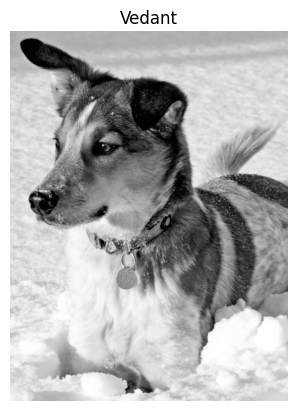

In [4]:
# TODO: convert img to grayscale

img = imread("DATA/dog.jpg")

gray = np.mean(img,-1)

plt.imshow(gray,cmap='gray')
plt.title("Vedant")
plt.axis('off')
plt.grid()
plt.show()

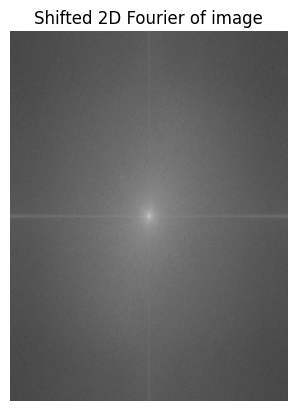

In [5]:
# TODO: compute 2D FFT of grayscale image
# TODO: shift FFT so low frequencies are centered

F=np.fft.fft2(gray)
F_shifted=np.fft.fftshift(F)
plt.imshow(np.log(1+np.abs(F_shifted)),cmap='gray')
plt.title("Shifted 2D Fourier of image")
plt.axis('off')
plt.grid()
plt.show()

In [6]:
compression_ratios = np.linspace(0.01,1.0,30) # Compressing it to these values
# compression_ratios=[0.5,0.10,0.01]
error = []
for r in compression_ratios:
    # TODO: copy FFT coefficients

    fft_temp = np.copy(F)
    fft_1D = abs(fft_temp).flatten()
    fft_1D_sorted = np.sort(fft_1D) # Small to Large

    # TODO: decide which coefficients to keep
    # hint: magnitude, thresholding, masking, etc.

    indices_to_keep = int(r * (fft_1D_sorted.shape[0]))
    threshold = fft_1D_sorted[-indices_to_keep]
    fft_temp[abs(fft_temp) < threshold] = 0
    
    # TODO: inverse shift
    # TODO: inverse FFT
    # TODO: take real part

    compressed_img = np.real(np.fft.ifft2(fft_temp))

    # TODO: compute error between original and reconstructed image

    err = np.linalg.norm(gray-compressed_img)/np.linalg.norm(gray)
    error.append(err)

    # plt.imshow(np.log(1+abs(np.fft.fftshift(fft_temp))),cmap='gray')
    # plt.title(f"Compressed FFT (r = {r:.2f}), Error = {err*100:.2f} %")
    # plt.axis('off')
    # plt.show()


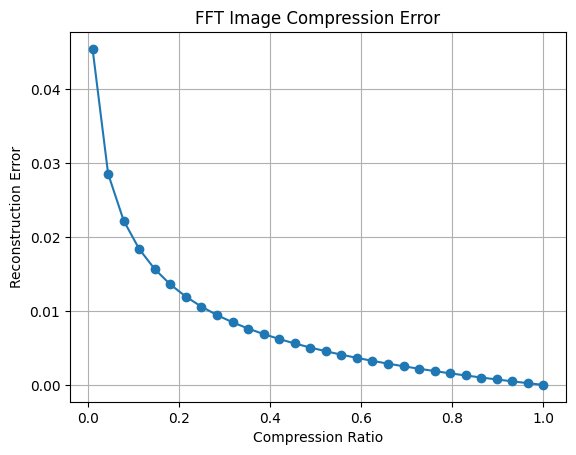

In [7]:
plt.figure()
plt.plot(compression_ratios,error,'o-')
plt.xlabel("Compression Ratio")
plt.ylabel("Reconstruction Error")
plt.title("FFT Image Compression Error")
plt.grid()
plt.show()

# Exercise 2-2: Fourier Series of a Triangle Wave

### Objective
Understand how a **Fourier series** represents a *periodic function* as a sum of sine and cosine modes, and how the **shape and smoothness** of a function affect the decay of its Fourier coefficients.
 
### Problem Statement
Consider the triangular wave defined on the domain  
\[
-2 < x < 2
\]

\
f(x) =
\begin{cases}
0, & x < -1 \\
1 - |x|, & |x| \le 1 \\
0, & x > 1
\end{cases}


1. Compute the **Fourier series coefficients** \(a_n\) and \(b_n\) for this function by hand.
2. Numerically evaluate and plot the first **100 cosine coefficients** \(a_n\) and **100 sine coefficients** \(b_n\).
3. Reconstruct the function using the first **10 Fourier modes**.
4. Plot the Fourier approximation on top of the true triangle wave.
5. In a few sentences, explain the difference between the **Fourier series** and the **Fourier transform**.

### Key Questions to Think About
- What symmetry does the triangle wave have?
- Which Fourier coefficients (sine or cosine) should vanish, and why?
- How fast do the Fourier coefficients decay with mode number?
- Why does the approximation struggle near sharp corners?
- How does this relate to the Gibbs phenomenon?

### Notes
- Since the function is defined on a **finite periodic domain**, a Fourier **series** is used instead of a Fourier transform.
- Numerical integration can be used to approximate the Fourier coefficients.
- The decay rate of coefficients is directly related to the smoothness of the function.

### Expected Outcome
- A stem plot showing the decay of \(a_n\) and \(b_n\).
- A Fourier reconstruction that captures the overall shape but shows oscillations near discontinuities in slope.
- Clear intuition for how Fourier series differ from Fourier transforms and when each is used.


In [8]:
# Domain setup

L = 2
x = np.linspace(-L,L,2000)
dx = x[1] - x[0]
# print(x)


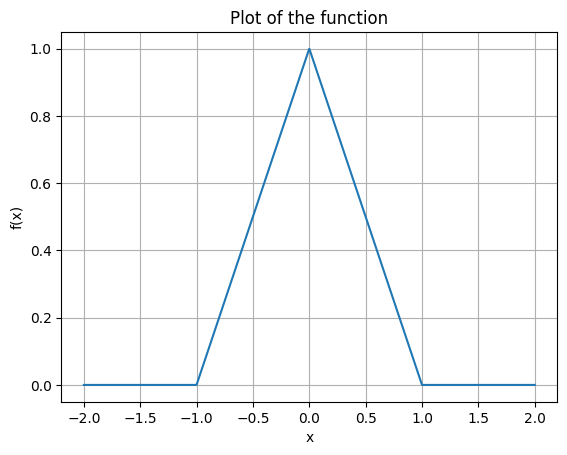

In [9]:
# TODO: define triangle wave
# f(x) = 1 - |x| for |x| <= 1
# f(x) = 0 otherwise

f = np.zeros_like(x)

for i in range(x.shape[0]):
    if (x[i] < -1):
        f[i] = 0
    elif (-1 <= x[i] <=0):
        f[i] = 1 + x[i]
    elif (0 < x[i] <=1):
        f[i] = 1 - x[i]
    elif (1 < x[i] <=2):
        f[i] = 0

plt.figure()
plt.plot(x,f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of the function")
plt.grid()
plt.show()

In [10]:
N = 50
a = np.zeros(N)
b = np.zeros(N)

# Constant term
a0 = (1/(2*L)) * np.sum(f) * dx

for n in range(1, N+1):
    for i in range(len(x)):
        a[n-1] += (1/L) * f[i] * np.cos(n*np.pi*x[i]/L) * dx
        b[n-1] += (1/L) * f[i] * np.sin(n*np.pi*x[i]/L) * dx


<Figure size 1200x400 with 0 Axes>

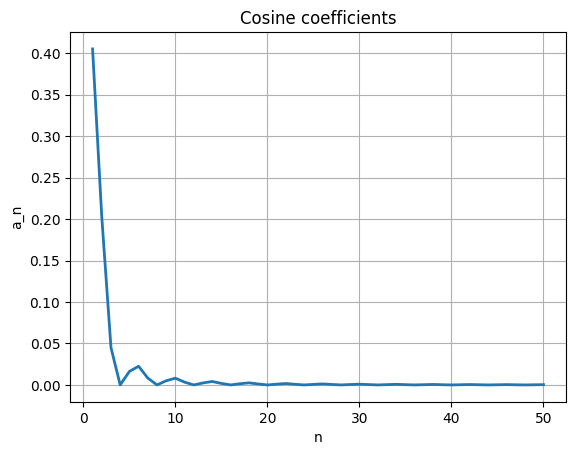

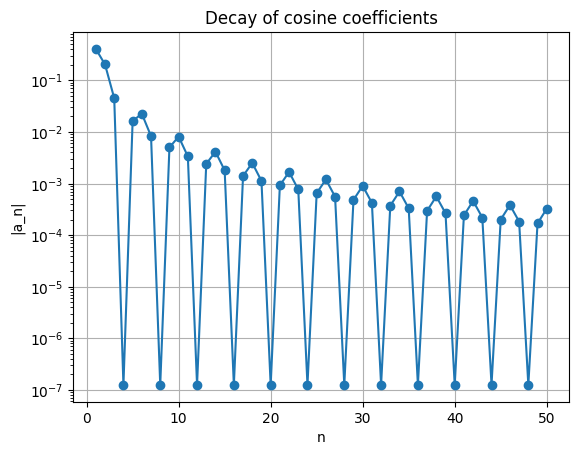

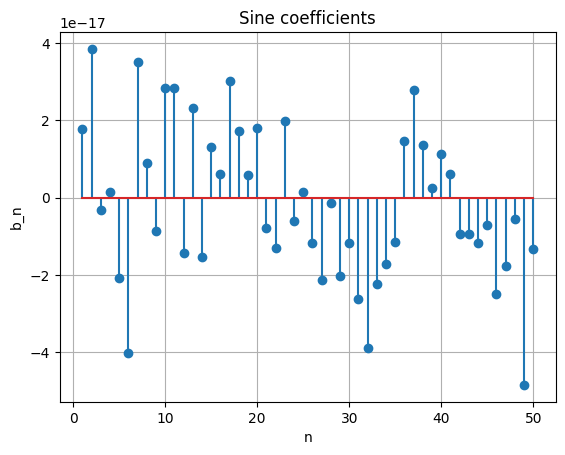

In [11]:
n_vals = np.arange(1, N + 1)

plt.figure(figsize=(12,4))

plt.figure()
plt.plot(n_vals, a, linewidth=2)
plt.xlabel("n")
plt.ylabel("a_n")
plt.title("Cosine coefficients")
plt.grid()
plt.show()

plt.figure()
plt.semilogy(n_vals, np.abs(a), 'o-')
plt.xlabel("n")
plt.ylabel("|a_n|")
plt.title("Decay of cosine coefficients")
plt.grid(True)
plt.show()

plt.figure()
plt.stem(n_vals, b)
plt.xlabel("n")
plt.ylabel("b_n")
plt.title("Sine coefficients")
plt.grid()
plt.show()

2000


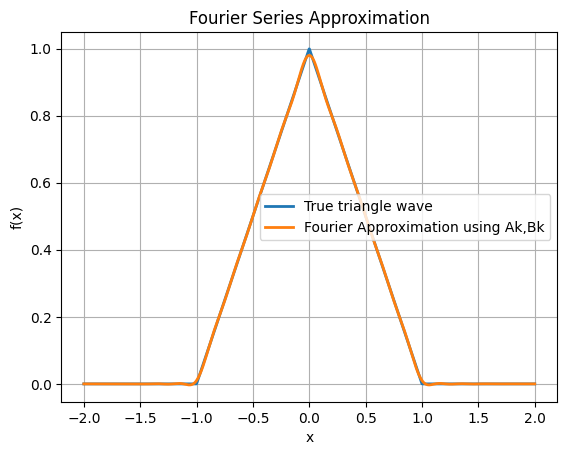

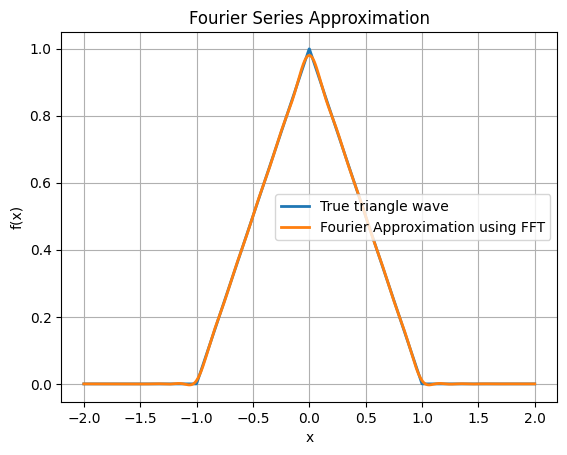

In [12]:
Nmodes = 20
f_approx = a0 * np.ones_like(x)
print(f_approx.shape[0])
for n in range(1, Nmodes+1):
    f_approx += a[n-1] * np.cos(n*np.pi*x/L) + b[n-1] * np.sin(n*np.pi*x/L)


plt.figure()
plt.plot(x, f, label="True triangle wave", linewidth=2)
plt.plot(x, f_approx, label="Fourier Approximation using Ak,Bk", linewidth=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fourier Series Approximation")
plt.legend()
plt.grid()
plt.show()


fft_f = np.fft.fft(f)
fft_truncated = np.zeros_like(fft_f)


fft_truncated[:Nmodes + 1] = fft_f[:Nmodes + 1]
fft_truncated[-Nmodes:] = fft_f[-Nmodes:]

f_fft_approx = np.real(np.fft.ifft(fft_truncated))

plt.figure()
plt.plot(x, f, label="True triangle wave", linewidth=2)
plt.plot(x, f_fft_approx, label="Fourier Approximation using FFT", linewidth=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Fourier Series Approximation")
plt.legend()
plt.grid()
plt.show()

# Exercise 2-3: Solving KdV Equation using FFT

---

### Objective  
Understand how **Fourier transforms** can be used to solve **nonlinear partial differential equations (PDEs)** by converting spatial derivatives into algebraic operations, and how this leads to efficient **spectral methods** for time-dependent problems.



### Problem Statement  

Consider the **Korteweg–de Vries (KdV) equation**

\[
u_t + u_{xxx} - u\,u_x = 0
\]

on a large **periodic domain**, with initial condition

\[
u(x,0) = \mathrm{sech}(x)
\]



### Tasks

1. Represent the spatial variable using a **uniform grid** on a large periodic domain.
2. Use the **Fast Fourier Transform (FFT)** to compute spatial derivatives:
   - \( u_x \)
   - \( u_{xxx} \)
3. Evaluate the **nonlinear term** \( u\,u_x \) in physical space.
4. Advance the solution forward in time using an explicit time-stepping scheme.
5. Plot the **evolution of the solution** \( u(x,t) \) over time.



### Key Questions to Think About

- Why are Fourier methods particularly well-suited for **high-order spatial derivatives**?
- How does differentiation in physical space translate to multiplication in Fourier space?
- Why is the nonlinear term computed in **physical space** instead of Fourier space?
- What role does **periodicity** play in the use of FFT?
- Why does the initial pulse maintain its shape as it propagates?



### Notes

- FFT assumes the solution is **periodic** in space.
- Spectral methods achieve high accuracy using **global basis functions**.
- The KdV equation supports **soliton solutions**, which propagate without changing shape.
- Care must be taken in choosing the time step to maintain numerical stability.
- This method is often called a **pseudo-spectral method**.



### Expected Outcome

- A sequence of plots showing the evolution of \( u(x,t) \).
- Observation of a traveling soliton.
- Clear understanding of how FFT-based differentiation simplifies PDE solvers.
- Insight into how spectral methods differ from finite-difference approaches.



### Conceptual Takeaway

This exercise demonstrates how Fourier transforms are not only tools for analysis, but also **powerful numerical engines** for solving dynamical systems governed by partial differential equations.

The same ideas appear later in:
- spectral fluid solvers
- reduced-order modeling
- Koopman operator theory
- physics-informed machine learning

---


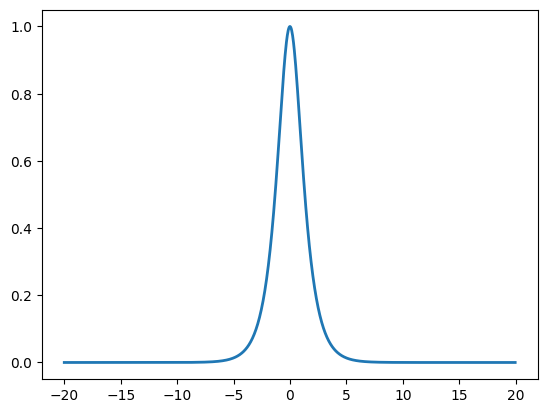

In [13]:
L = 20.0
N = 1024
x = np.linspace(-L,L,N, endpoint=False)
dx = x[1] - x[0]

u0 = 1 / np.cosh(x)

plt.figure()
plt.plot(x, u0, label="Sech(x) Function", linewidth=2)
plt.show()

In [14]:
# TODO:
# Use np.fft.fftfreq to construct the wave number vector k
# Remember to scale by 2*pi cause kappa is wave number
kappa = 2*np.pi*np.fft.fftfreq(N,dx)
u0hat = np.fft.fft(u0)
# mag_sorted = np.sort(abs(u0hat))
# function_compression = [0.9,0.01]
# for i in function_compression:
#     u0hat_temp = np.copy(u0hat)
#     indices_to_keep = int(i * (mag_sorted.shape[0]))
#     threshold = mag_sorted[-indices_to_keep]
#     u0hat_temp[abs(u0hat_temp) < threshold] = 0

#     u0_compressed = np.real(np.fft.ifft(u0hat_temp))
#     plt.figure()
#     plt.plot(x,u0_compressed)

dt = 0.01                          # time step
T  = 5.0                           # final time
t_steps = int(T / dt)



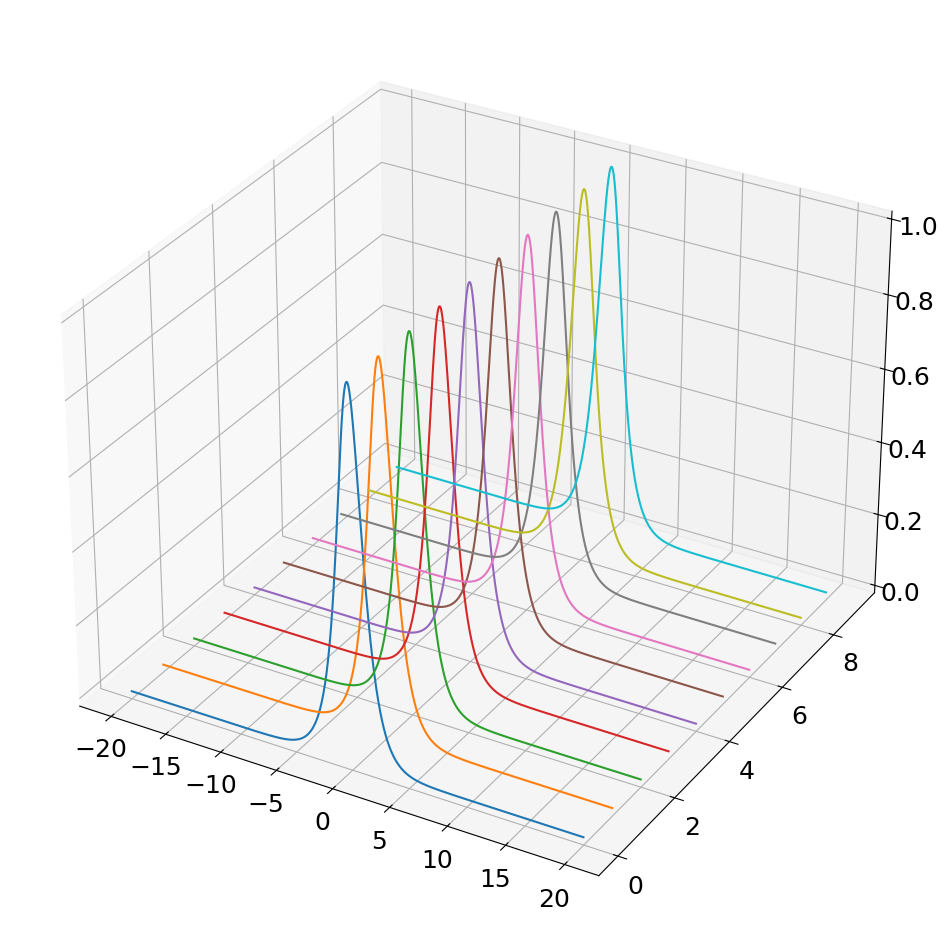

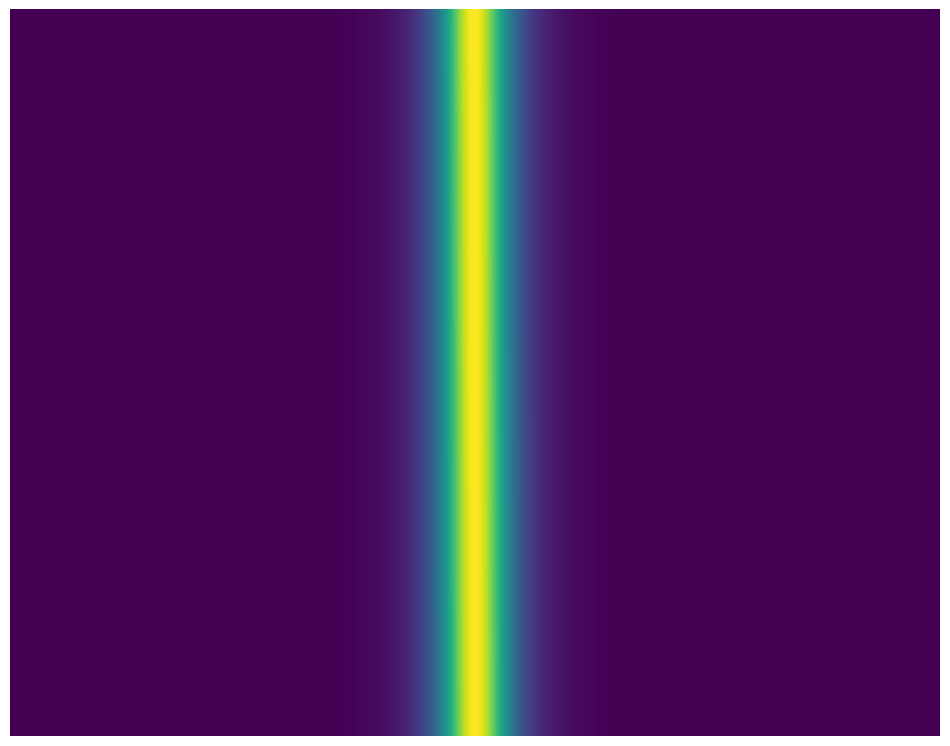

In [15]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

L = 40     # Length of domain
N = 1024   # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)/L


# Initial condition
u0 = 1/np.cosh(x)

# Simulate PDE in spatial domain
dt = 0.025
t = np.arange(0,100*dt,dt)

def rhsKdV(u,t,kappa):
    uhat = np.fft.fft(u)
    d_uhat = (1j)*kappa*uhat
    ddd_uhat = (1j * kappa)**3 * uhat
    d_u = np.fft.ifft(d_uhat)
    ddd_u = np.fft.ifft(ddd_uhat)
    du_dt = u * d_u - ddd_u
    return du_dt.real

u = odeint(rhsKdV, u0, t, args=(kappa,))

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()